In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import functions.handy_functions as hf
import functions.parse_data as parse

from sklearn.decomposition import PCA

2024-05-03 07:15:41.905403: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 07:15:41.939380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 07:15:41.939398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 07:15:41.940280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 07:15:41.946235: I tensorflow/core/platform/cpu_feature_guar

In [2]:

data_clear=parse.parse('cloudrm3_clear_newsurf.dat')
data_ice=parse.parse('cloudrm3_ice_newsurf.dat')
data_mixed=parse.parse('cloudrm3_mixed_newsurf.dat')
data_water=parse.parse('cloudrm3_water_newsurf.dat')

data_all=pd.concat([data_water,data_clear,data_mixed,data_ice])
data_all=data_all.drop(columns=['Cloud_B01','Clear_B01'])

data_all=hf.dumb_down_surface(data_all) #Create simpler labels for surface descriptio 

In [3]:
data_all.Surface_Desc.value_counts()

Surface_Desc
Mixed                        190000
water-snow-mediumgranular      1689
water-snow-finegranular        1683
water-snow-coarsegranular      1681
water-tapwater-none            1671
water-ice-none                 1661
water-frost-none               1615
Name: count, dtype: int64

In [7]:
data_all.Surface_Desc_Dumb.value_counts()

Surface_Desc_Dumb
Mixed    190000
water     10000
Name: count, dtype: int64

In [8]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

(array([ 6833.,  4738., 10290., 15541., 23610., 28265., 31017., 27826.,
        23015., 28865.]),
 array([0.03668 , 0.130717, 0.224754, 0.318791, 0.412828, 0.506865,
        0.600902, 0.694939, 0.788976, 0.883013, 0.97705 ]),
 <BarContainer object of 10 artists>)

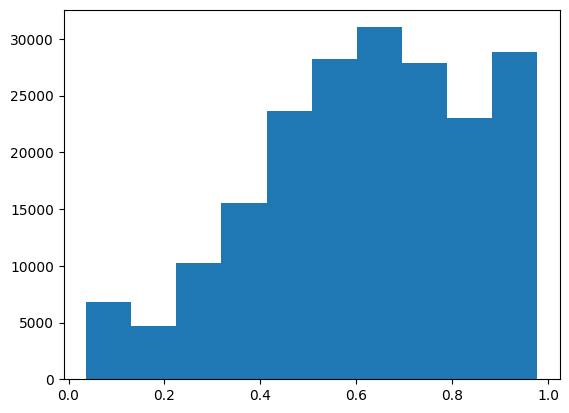

In [9]:
plt.hist(data_all['Clear_B12'])

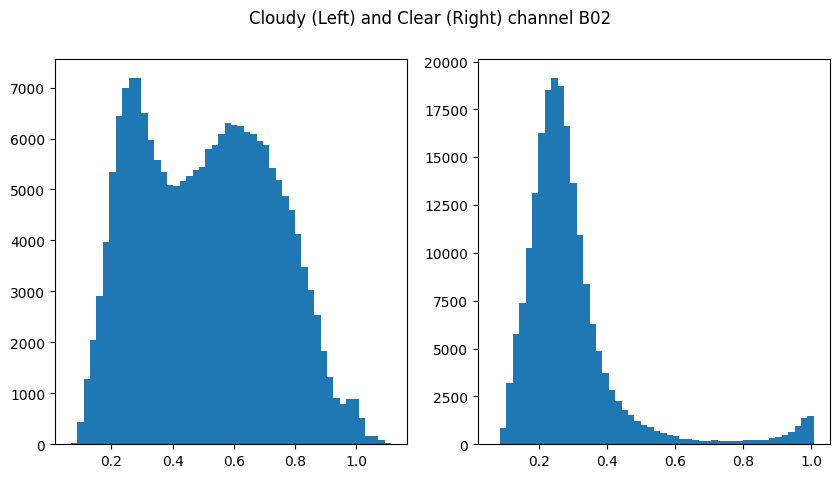

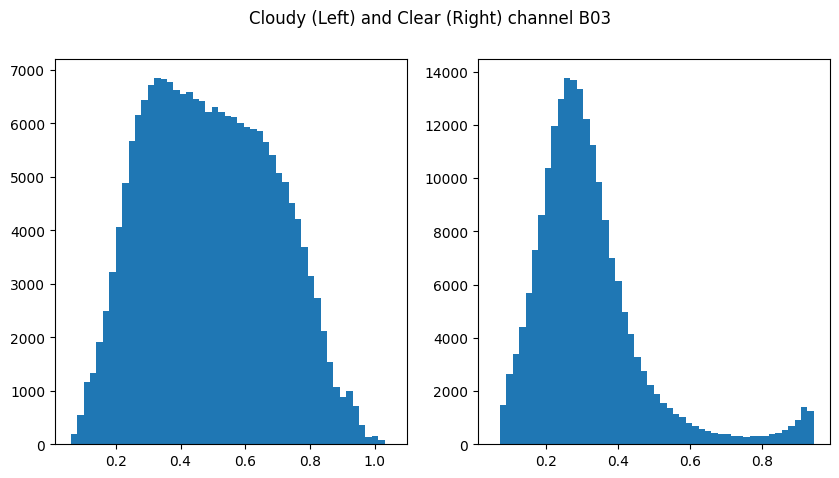

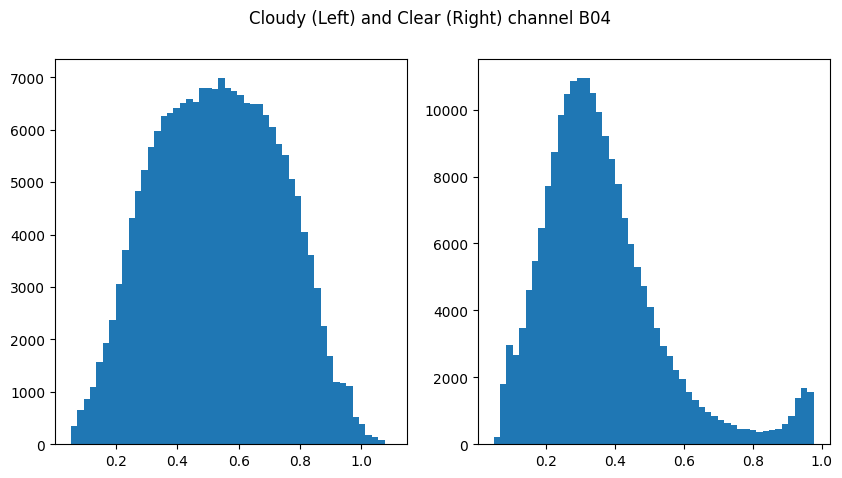

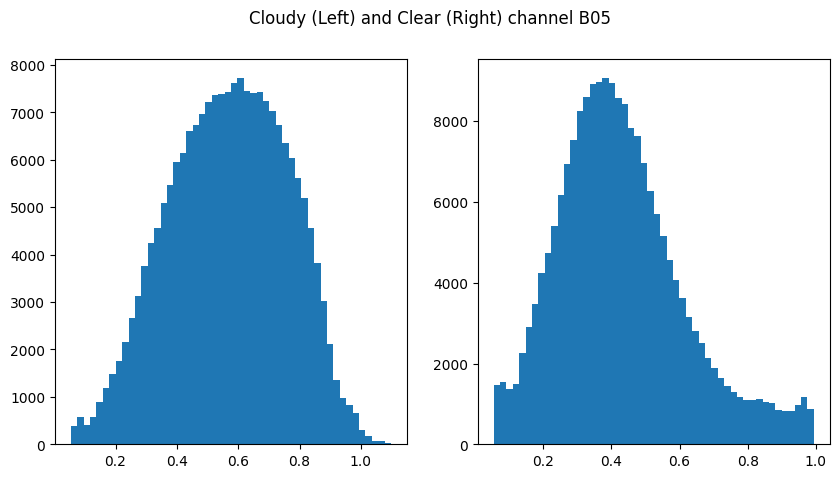

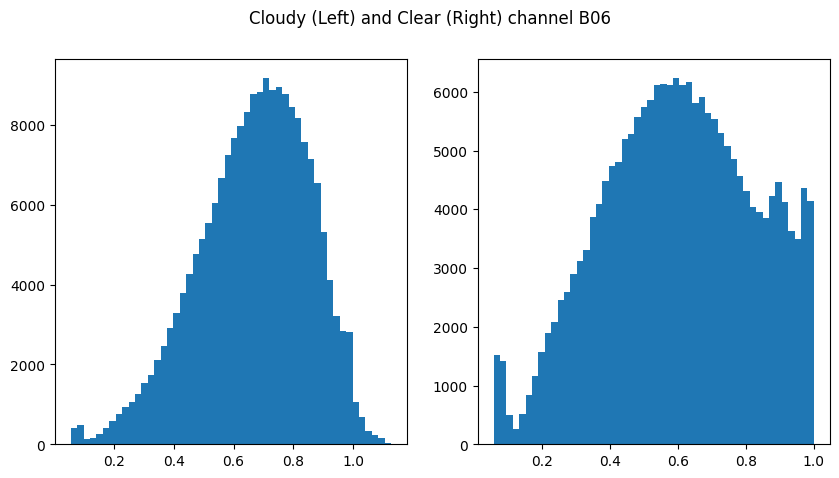

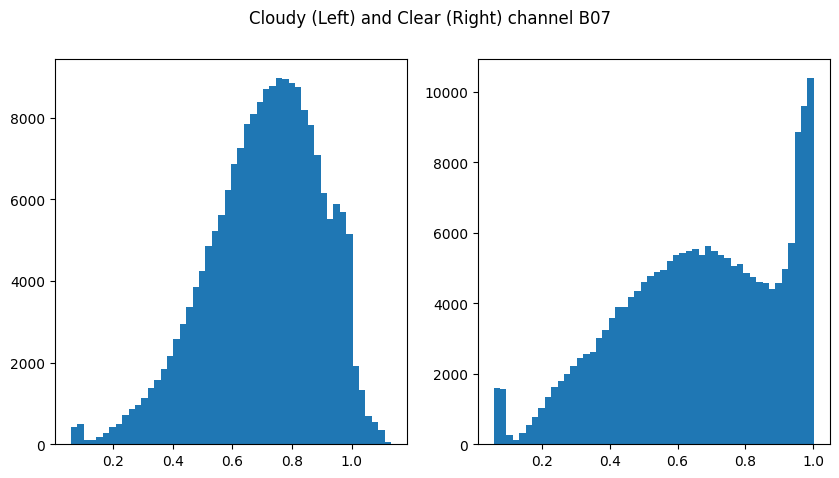

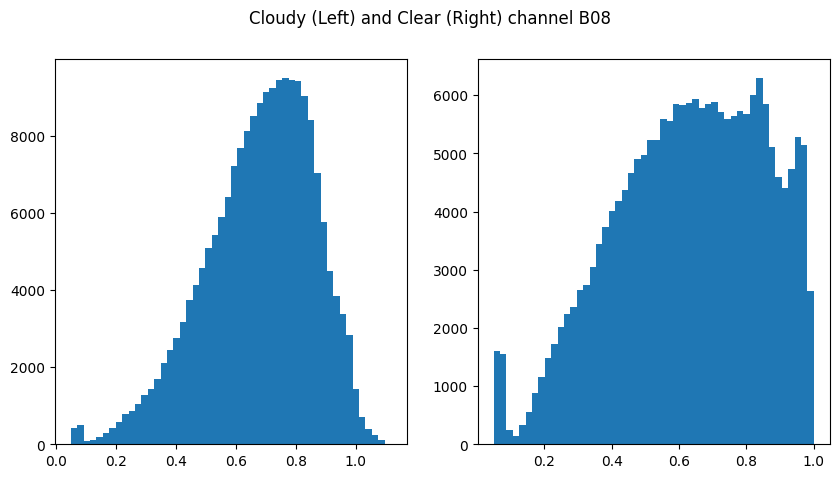

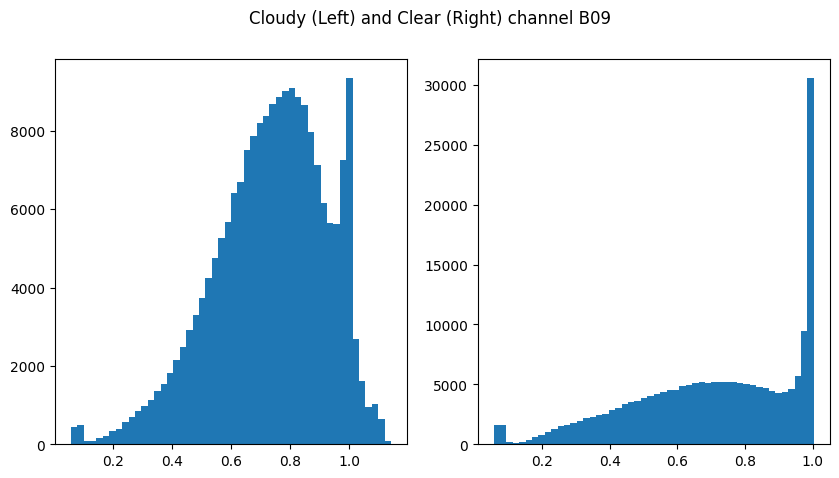

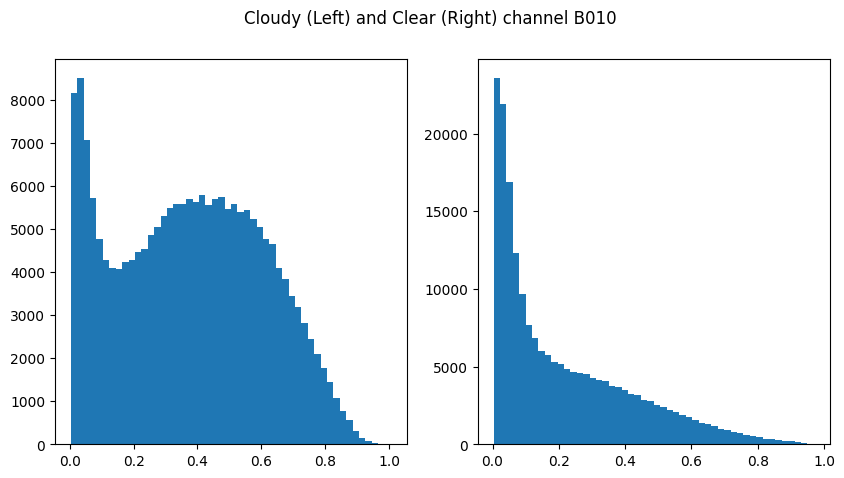

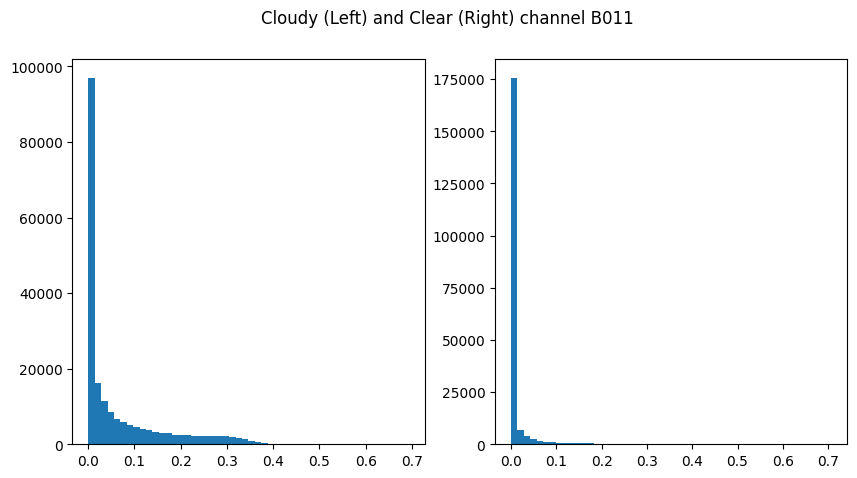

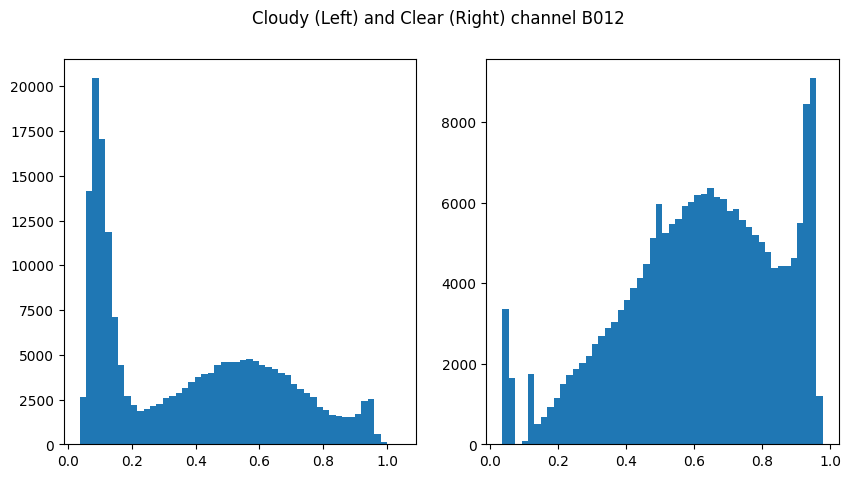

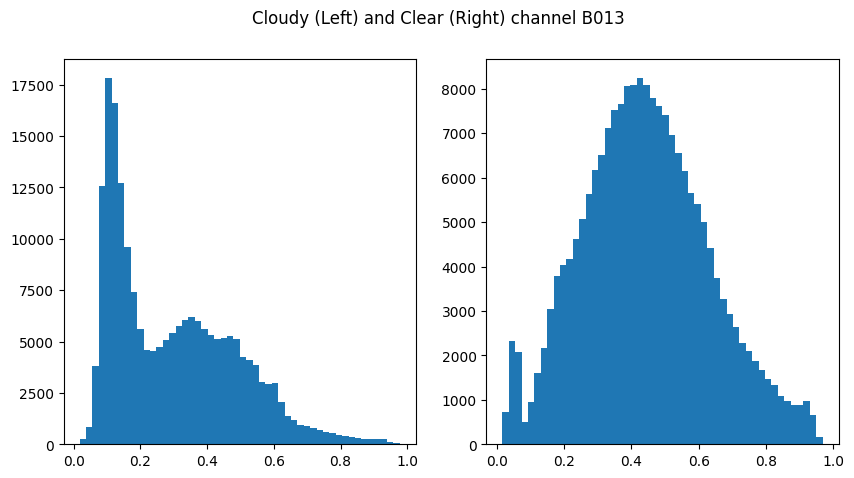

In [10]:
plt.rcParams["figure.figsize"] = [10, 5]
for i in range(2,14):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Cloudy (Left) and Clear (Right) channel B0"+str(i))
    if i<=9:
        ax1.hist(data_all['Cloud_'+'B0'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B0'+str(i)],bins=50)
    else:
        ax1.hist(data_all['Cloud_'+'B'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B'+str(i)],bins=50)

In [11]:
data_tap=data_all[data_all['Surface_Desc']=='water-tapwater-none']

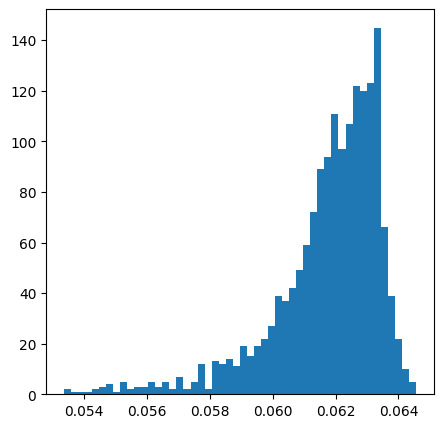

In [12]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.hist(data_tap['Clear_B12'],bins=50)
plt.show()

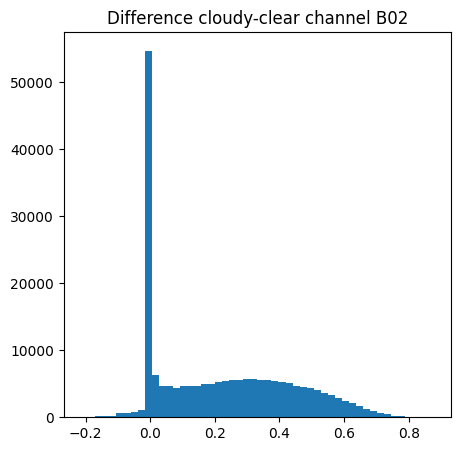

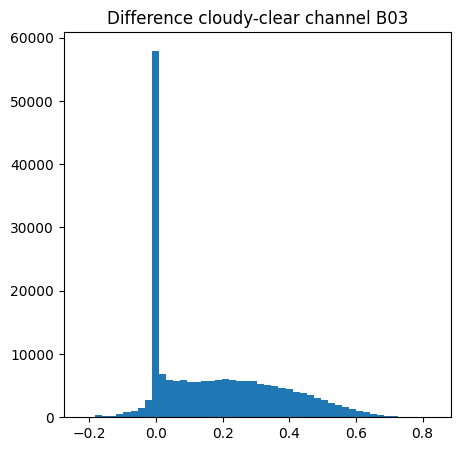

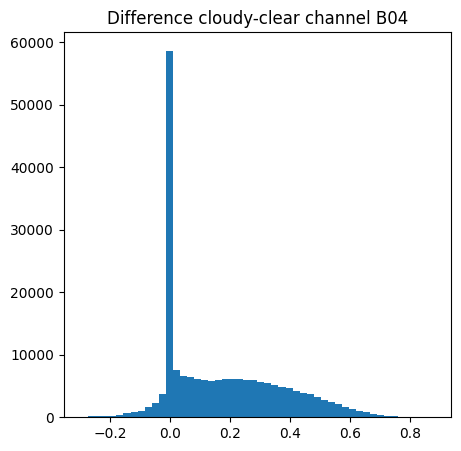

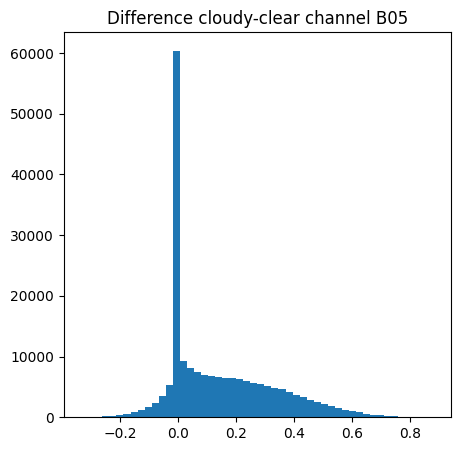

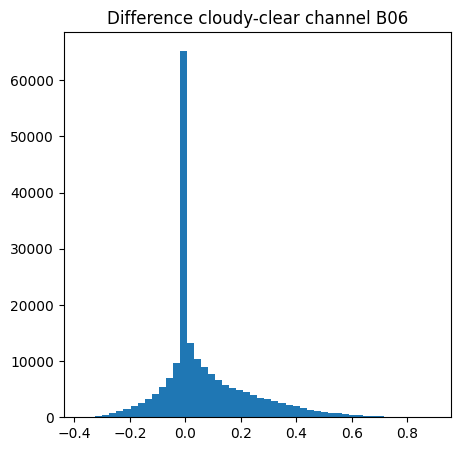

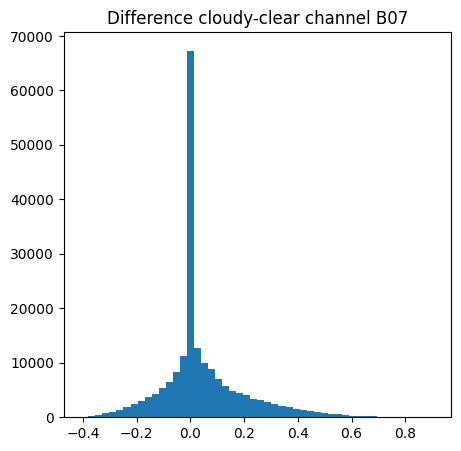

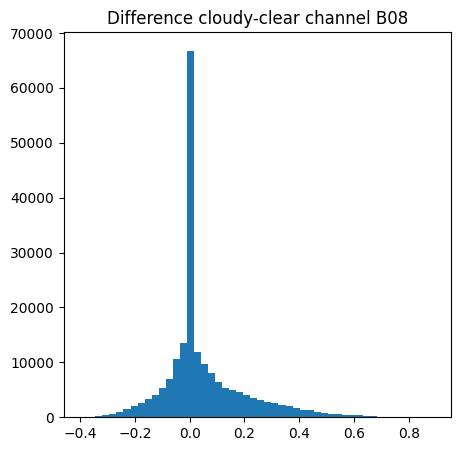

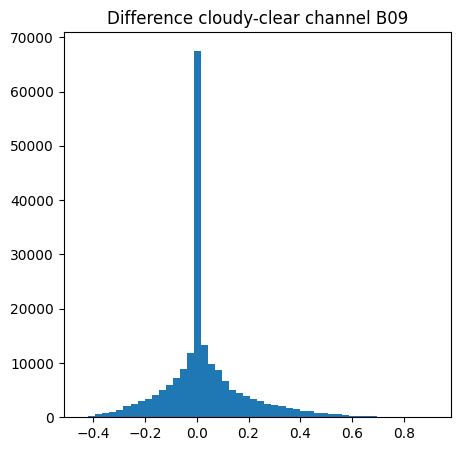

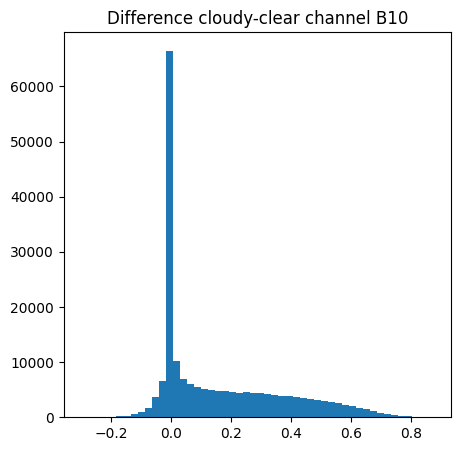

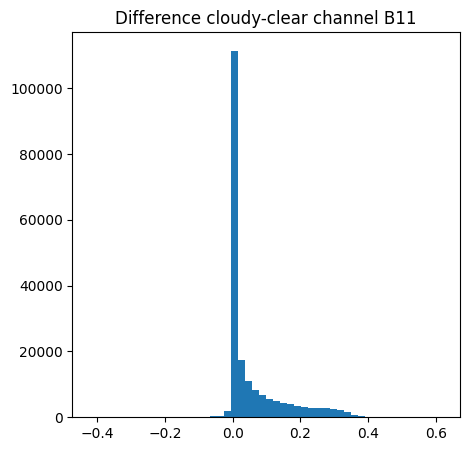

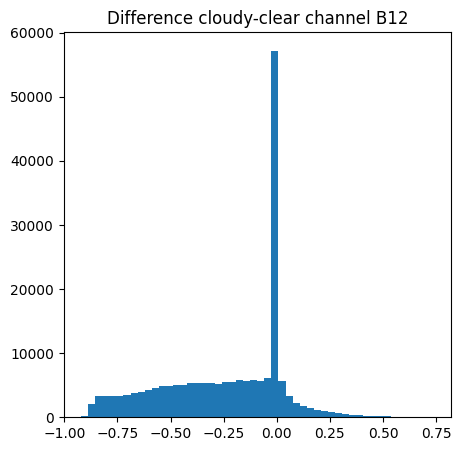

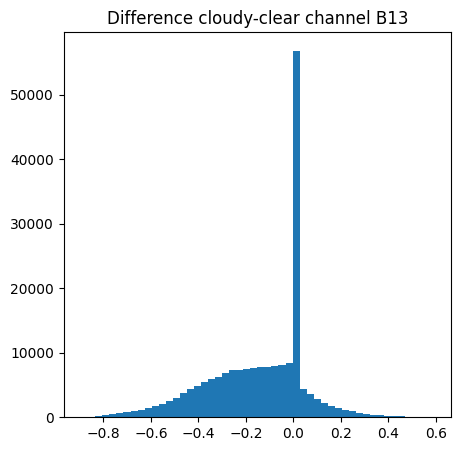

In [13]:
for i in range(2,14):
    
    if i<=9:
        plt.hist(data_all['Cloud_'+'B0'+str(i)]-data_all['Clear_'+'B0'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B0"+str(i))
        plt.show()
    else:
        plt.hist(data_all['Cloud_'+'B'+str(i)]-data_all['Clear_'+'B'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B"+str(i))
        plt.show()

## Histograms divided by surface description

In [14]:
data_all.Surface_Desc.value_counts()

Surface_Desc
Mixed                        190000
water-snow-mediumgranular      1689
water-snow-finegranular        1683
water-snow-coarsegranular      1681
water-tapwater-none            1671
water-ice-none                 1661
water-frost-none               1615
Name: count, dtype: int64

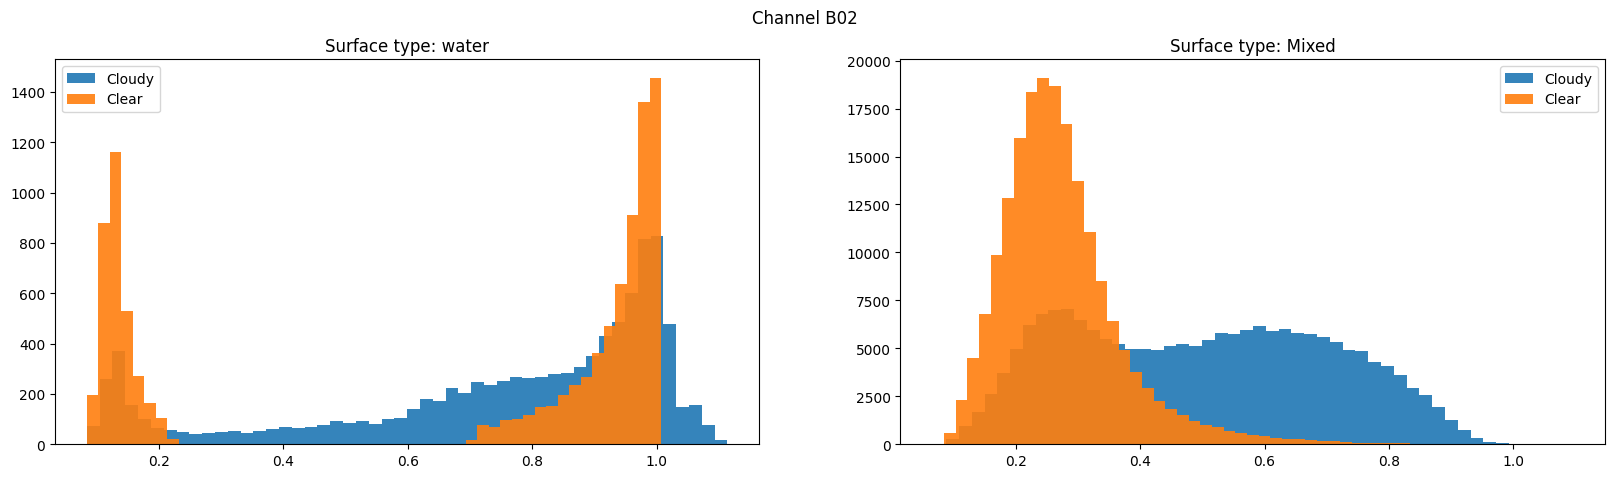

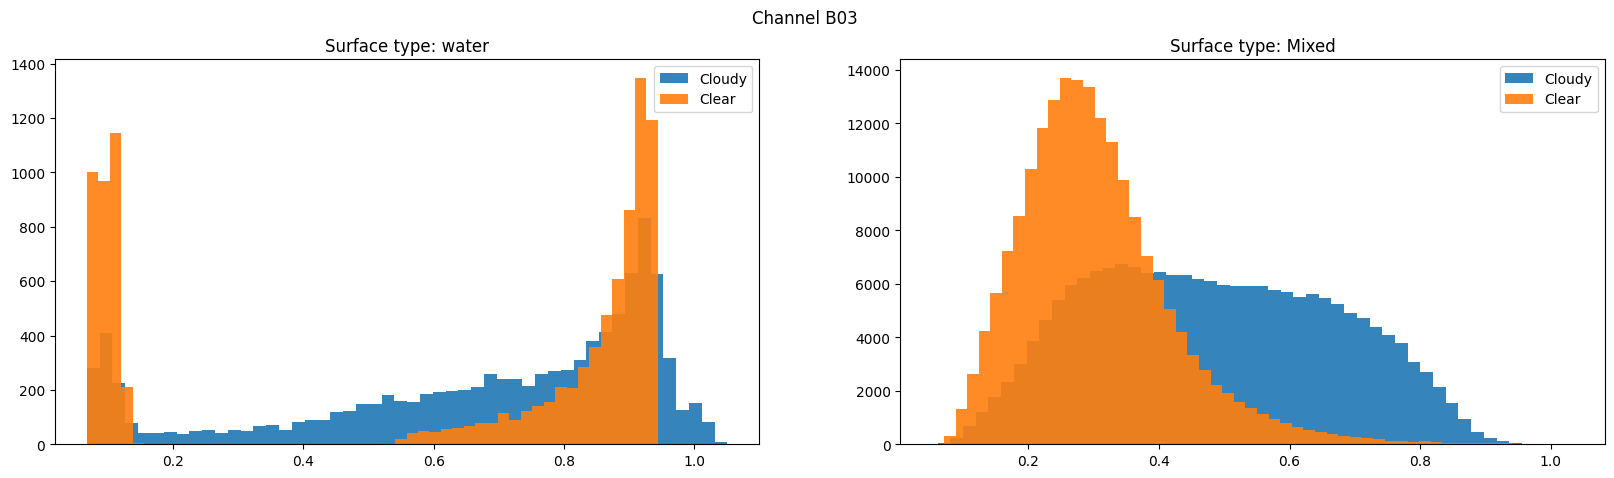

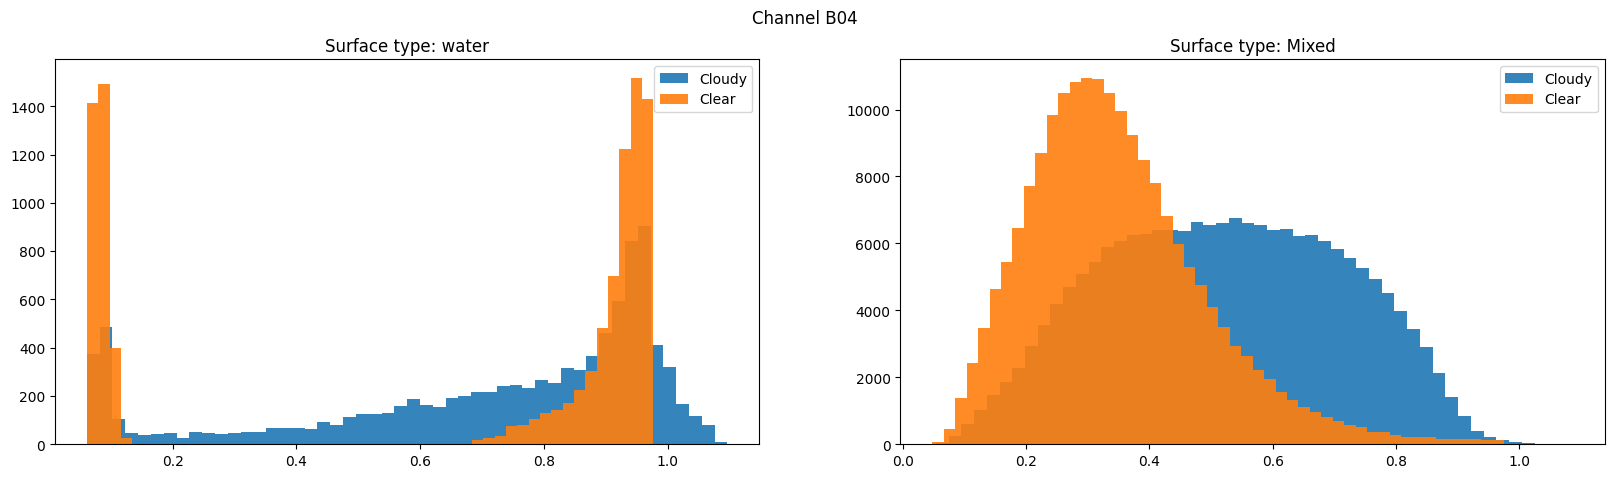

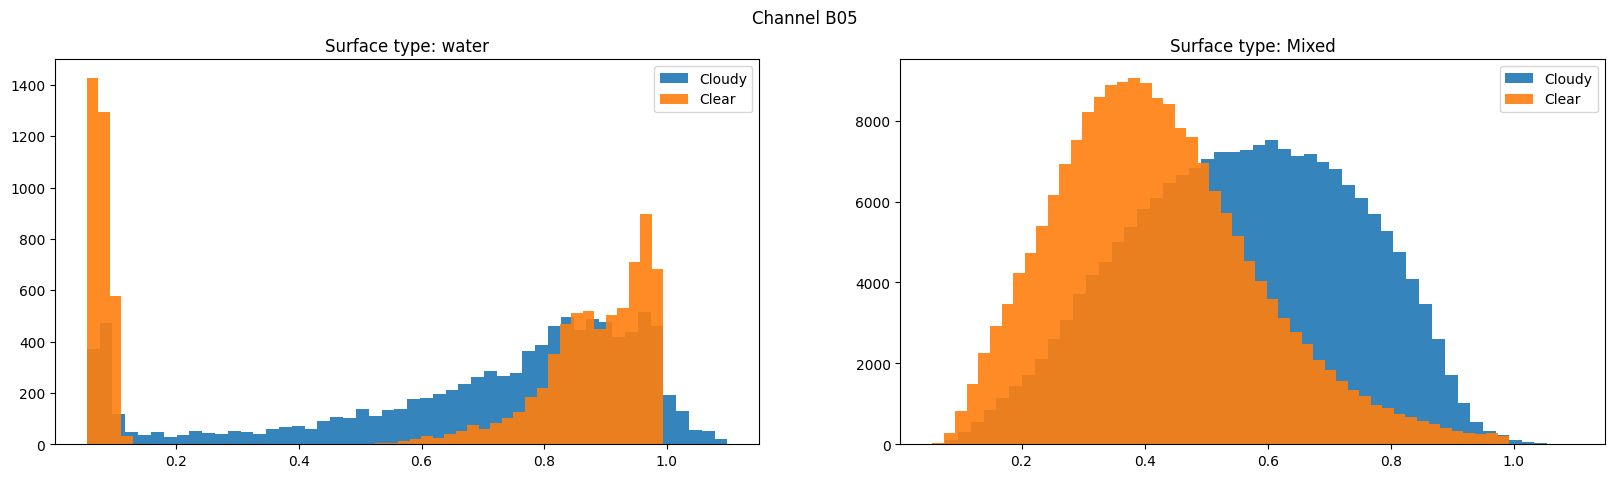

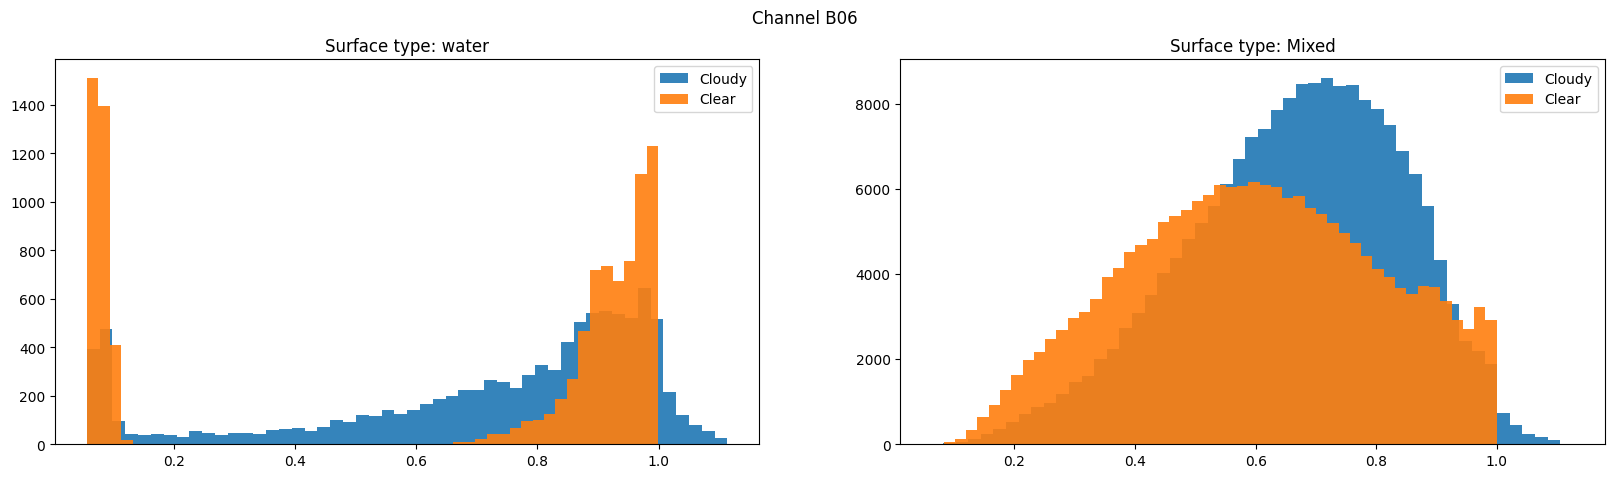

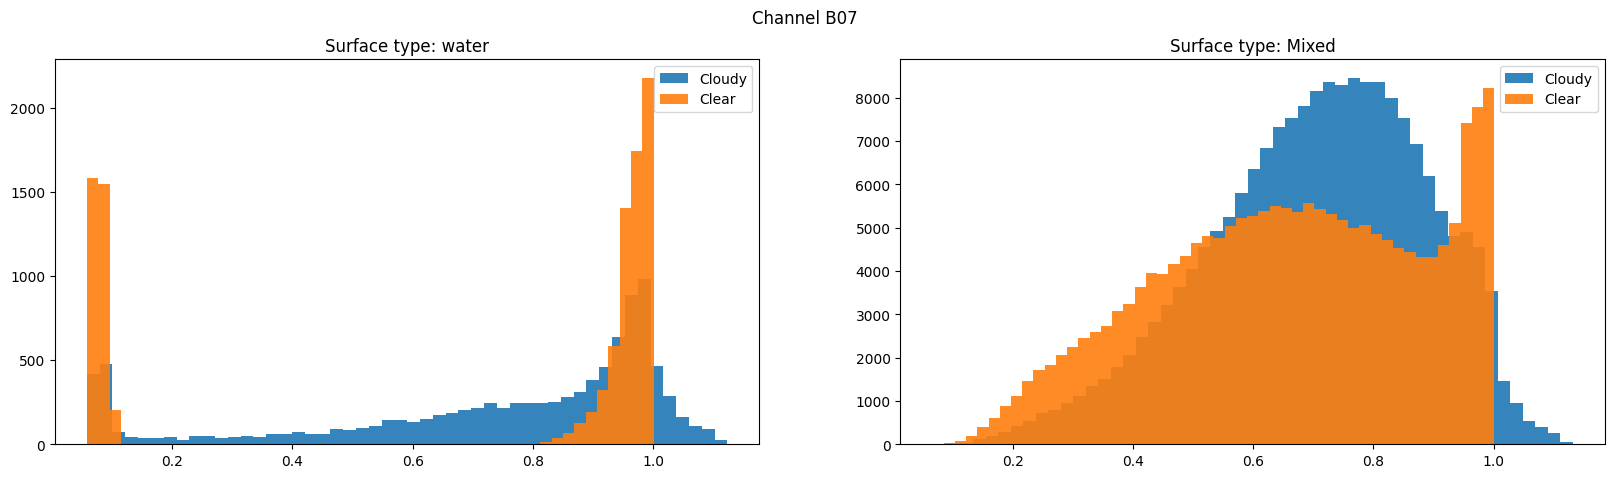

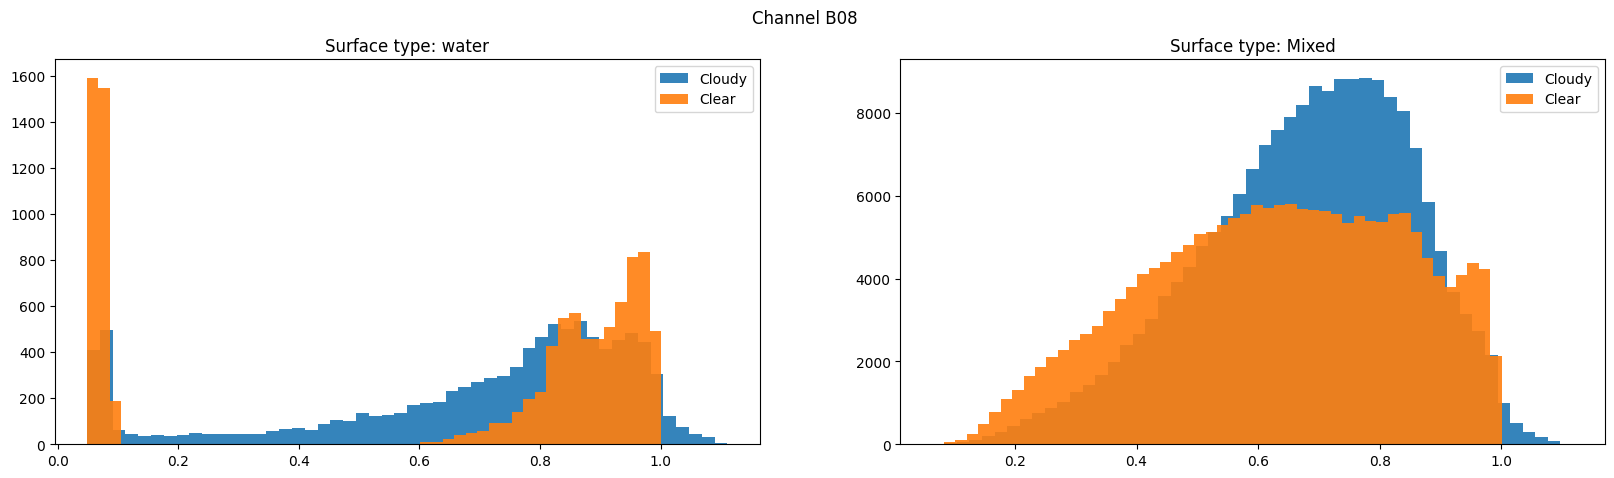

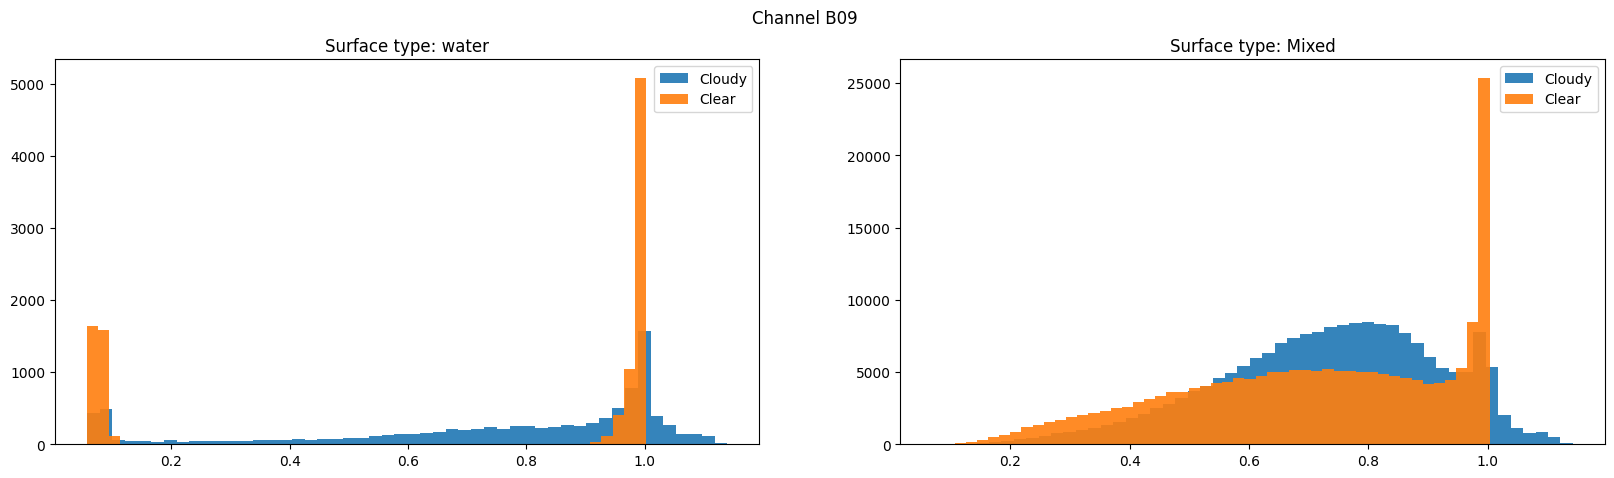

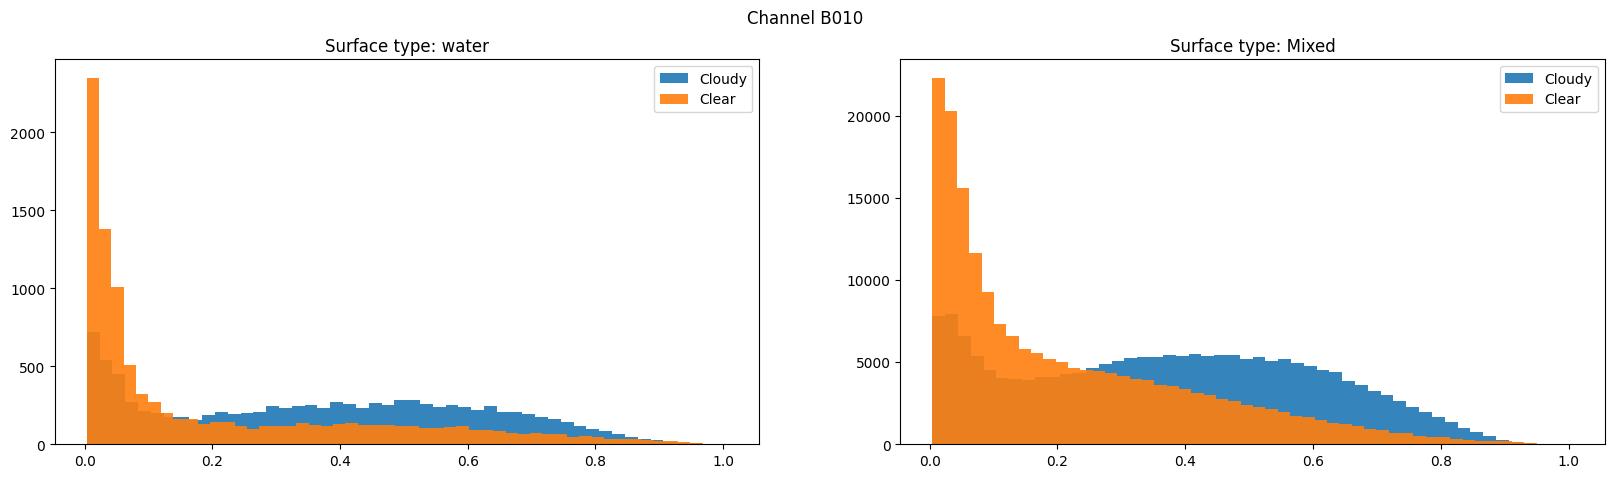

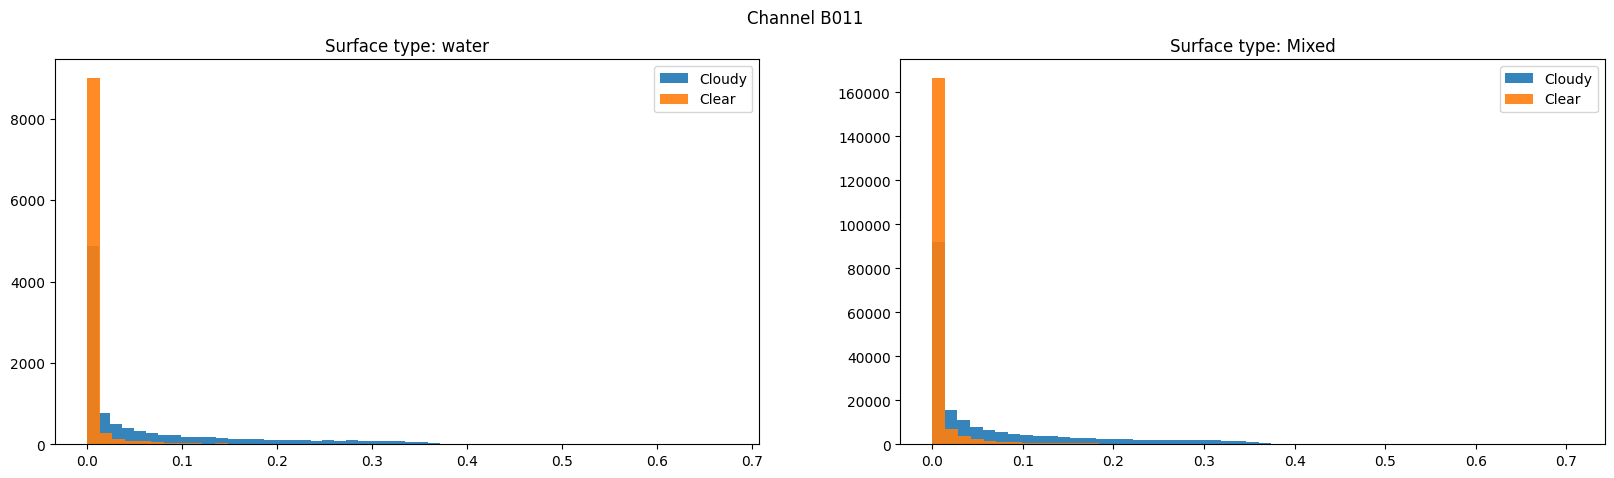

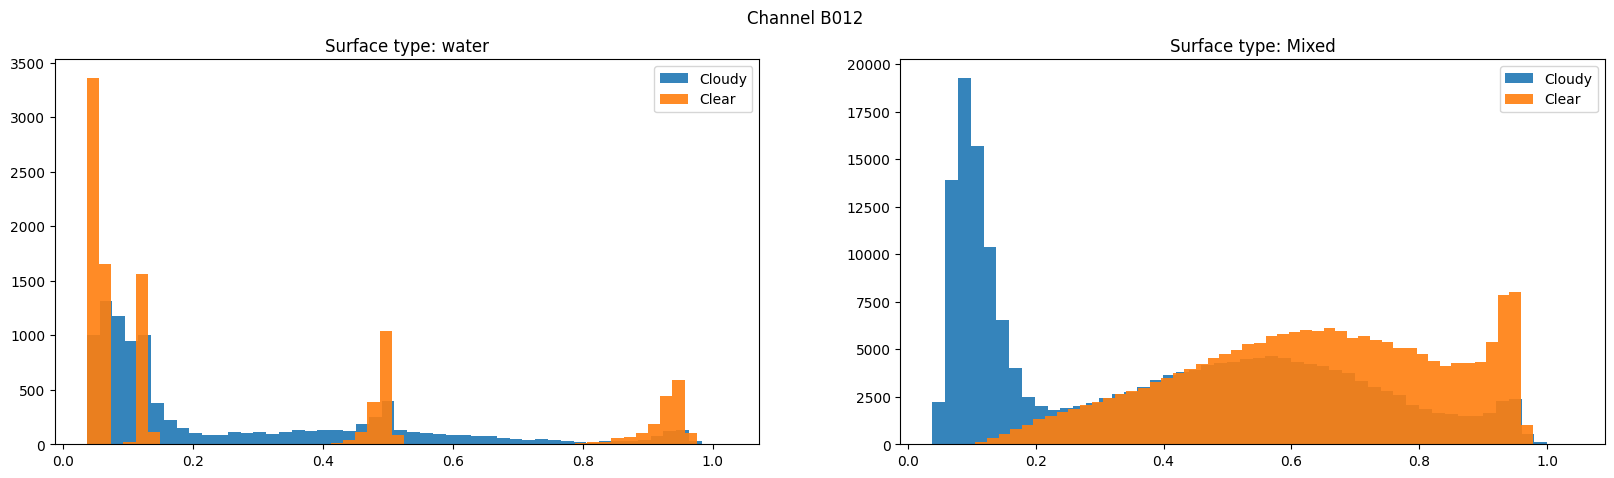

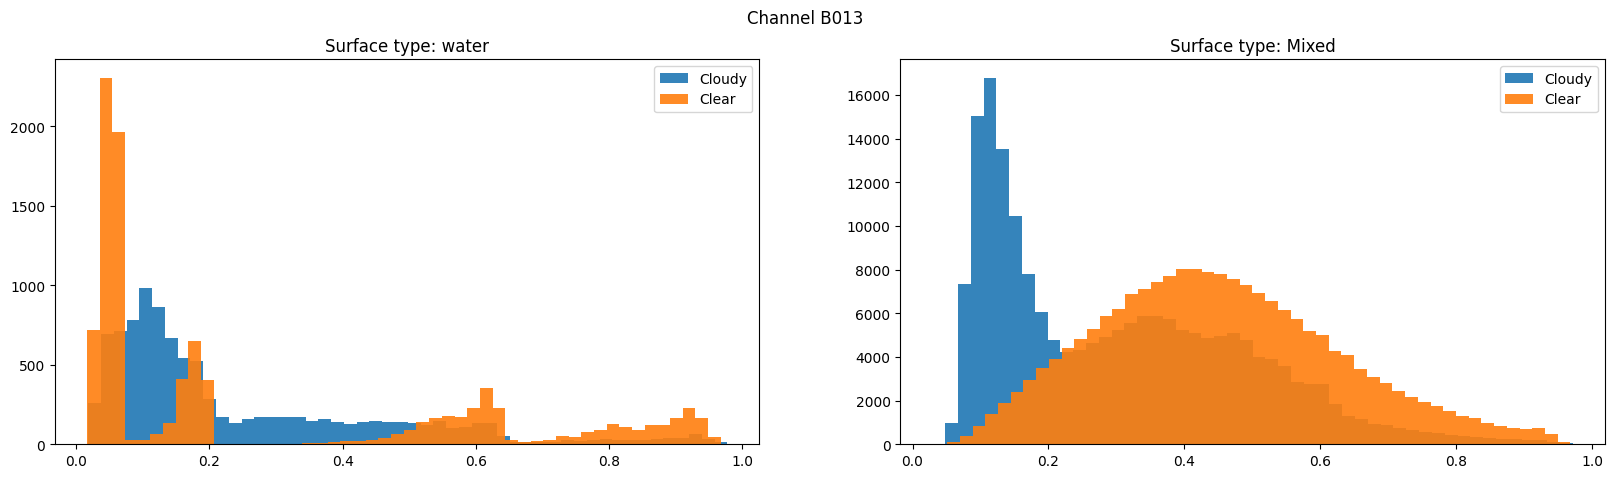

In [15]:
surface_labels=data_all.Surface_Desc_Dumb.unique()
plt.rcParams["figure.figsize"] = [20, 5]
for i in range(2,14):
    fig, axs = plt.subplots(1,len(surface_labels))
    
    if i<=9:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

    else:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

In [16]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

/home/edgelab/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


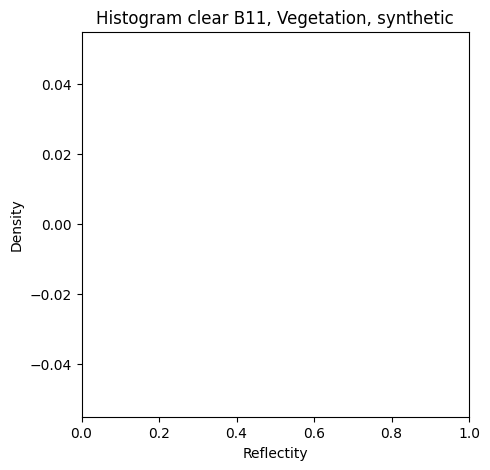

In [17]:
df_tmp=data_all.loc[data_all['Surface_Desc_Dumb']=='vegetation']
plt.rcParams["figure.figsize"] = [5, 5]
plt.hist(df_tmp['Clear_B12'],bins=50,density=True)
plt.xlim([0,1])
plt.title('Histogram clear B11, Vegetation, synthetic')
plt.xlabel('Reflectity')
plt.ylabel('Density')
plt.show()

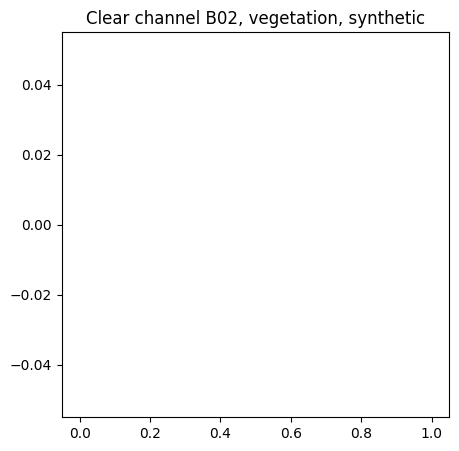

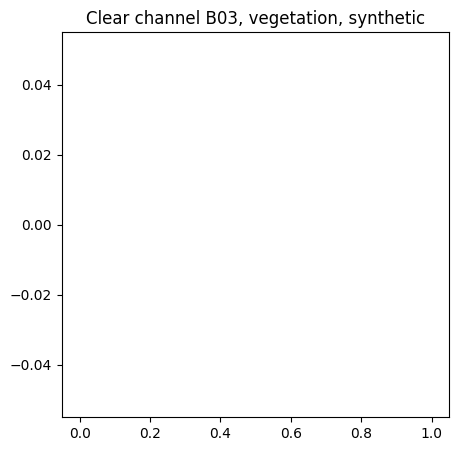

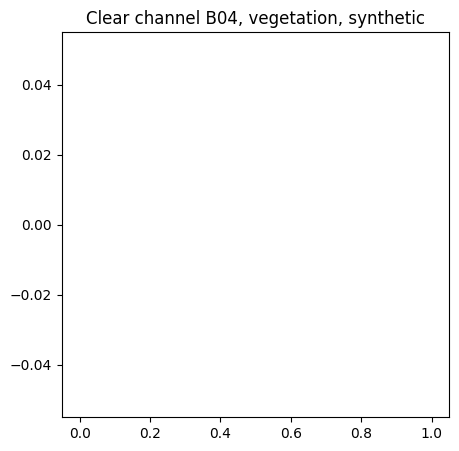

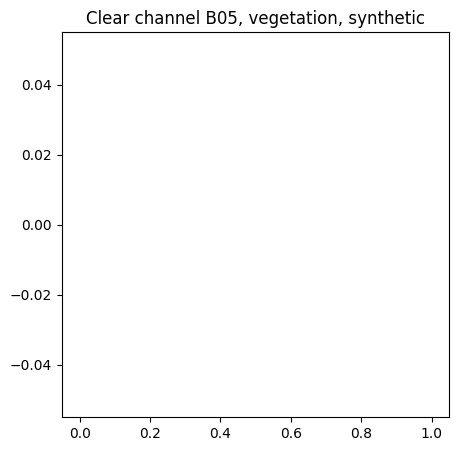

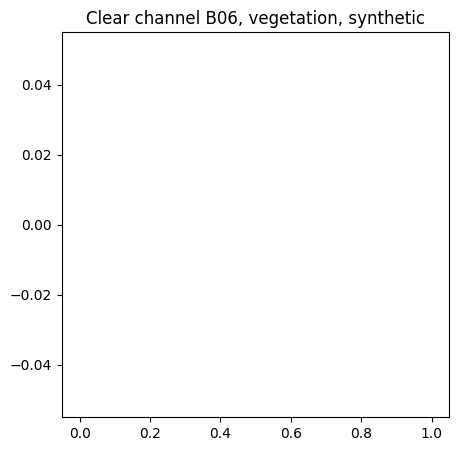

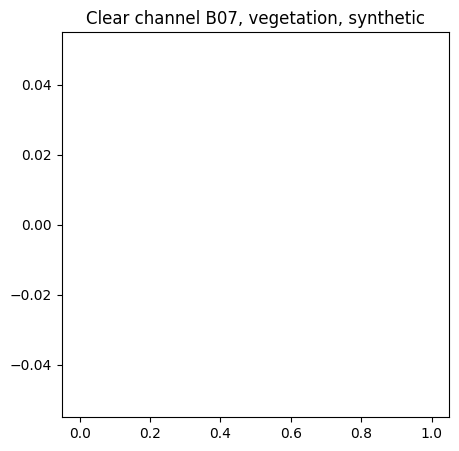

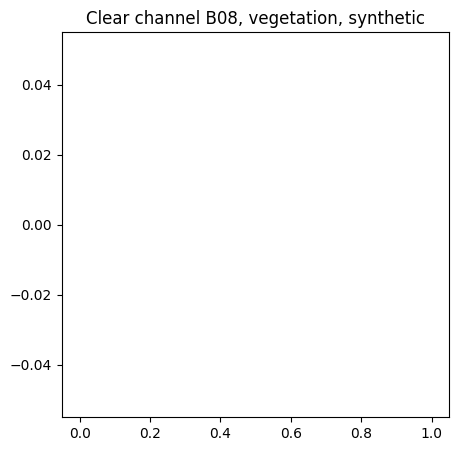

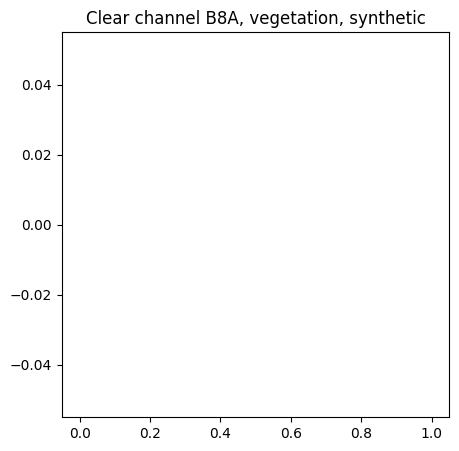

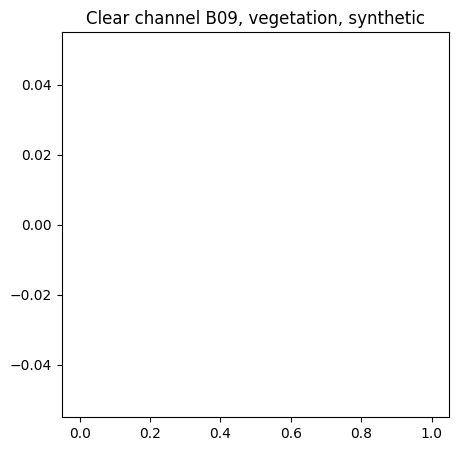

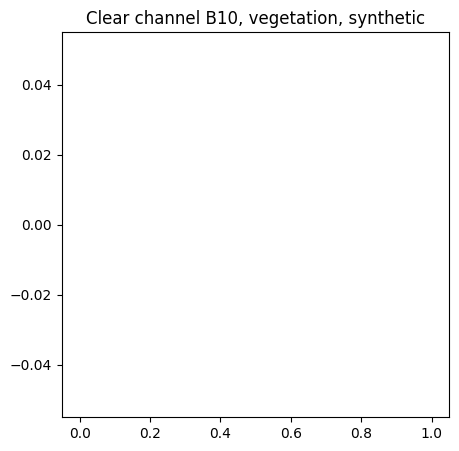

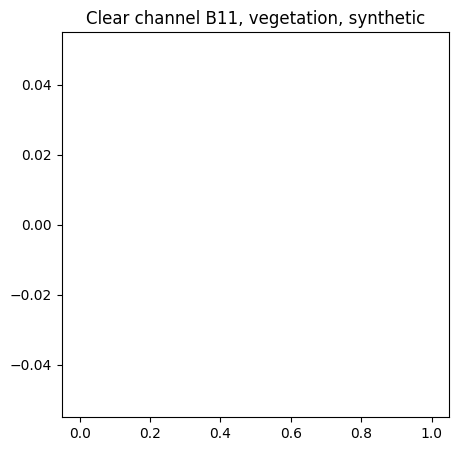

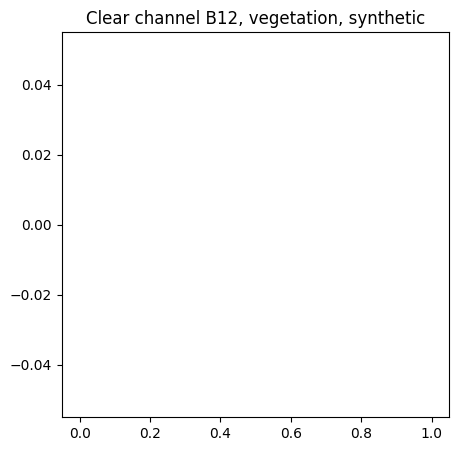

In [18]:

plt.rcParams["figure.figsize"] = [5, 5]
for i in range(2,14):
    df_tmp=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
    if i<=8:
        plt.hist(df_tmp['Clear_'+'B0'+str(i)],bins=50)
        plt.title('Clear channel B0'+str(i)+', vegetation, synthetic')
    elif i==9:
        plt.hist(df_tmp['Clear_'+'B0'+str(i)],bins=50)
        plt.title('Clear channel B8A, vegetation, synthetic')
    elif i==10:
        plt.hist(df_tmp['Clear_'+'B'+str(i)],bins=50)
        plt.title('Clear channel B09, vegetation, synthetic')
    else:   
        plt.hist(df_tmp['Clear_'+'B'+str(i)],bins=50)
        plt.title('Clear channel B'+str(i-1)+', vegetation, synthetic')
    plt.show()



In [19]:
tm=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
tm.Clear_B13.value_counts()

Series([], Name: count, dtype: int64)

In [20]:
cloudy_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13']

clear_columns=['Clear_B02','Clear_B03', 'Clear_B04', 
               'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
               'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

channel_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13',
                'Clear_B02','Clear_B03', 'Clear_B04', 
                'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
                'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

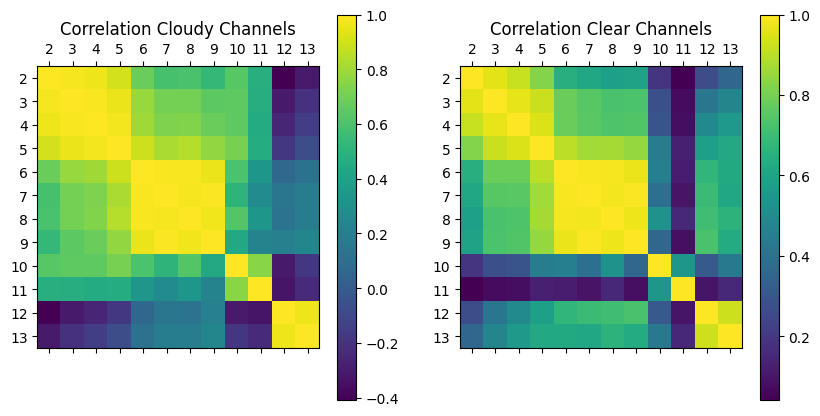

In [21]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, (ax1, ax2) = plt.subplots(1,2)
fig_1=ax1.matshow(data_all[cloudy_columns].corr())
fig_2=ax2.matshow(data_all[clear_columns].corr())
fig.colorbar(fig_1,ax=ax1)
fig.colorbar(fig_2,ax=ax2)

#Set titles
ax1.title.set_text('Correlation Cloudy Channels')
ax2.title.set_text('Correlation Clear Channels')

#Set ticks subplot 1
ax1.set_xticks(range(0,12))
ax1.set_yticks(range(0,12))
ax1.set_xticklabels(range(2,14))
ax1.set_yticklabels(range(2,14))

ax2.set_xticks(range(0,12))
ax2.set_yticks(range(0,12))
ax2.set_xticklabels(range(2,14))
ax2.set_yticklabels(range(2,14))

plt.show()

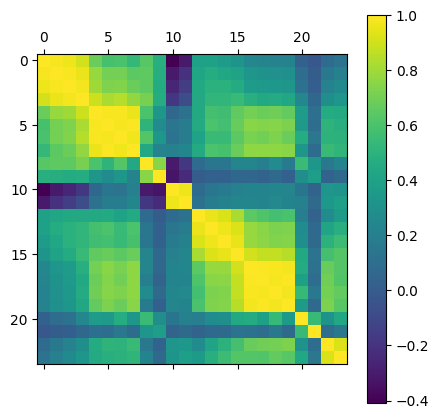

In [22]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.matshow(data_all[channel_columns].corr())
plt.colorbar()

## Eigenvalue decomposition

In [23]:
cloudy_cov=data_all[cloudy_columns].corr()
[U,S,V]=np.linalg.svd(cloudy_cov)

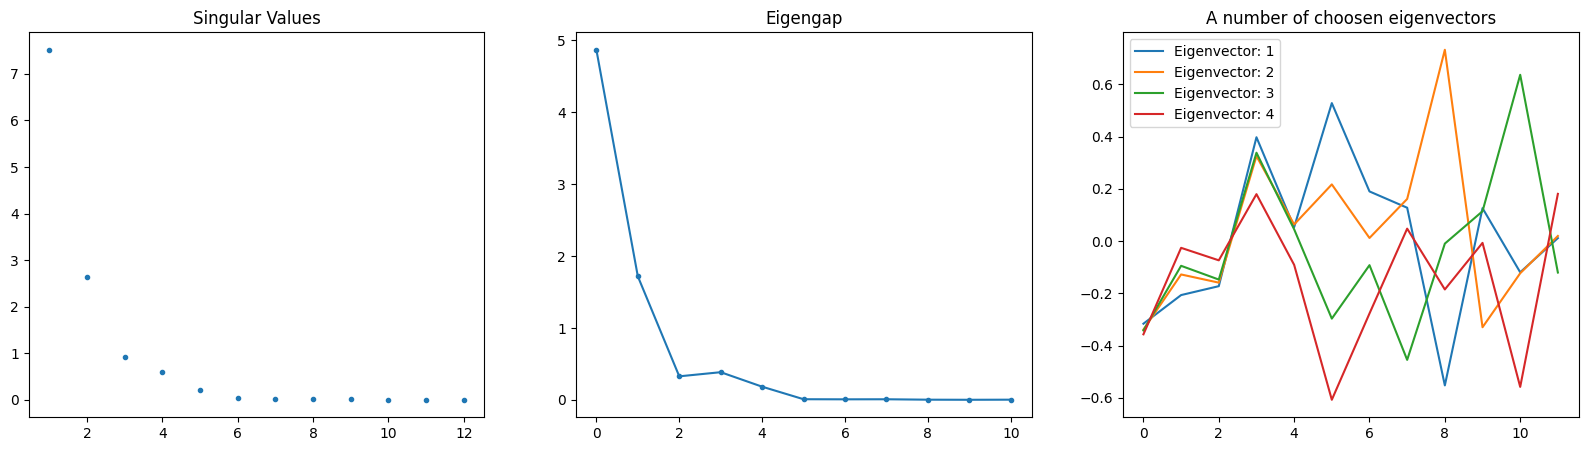

In [24]:
x=[i+1 for i in range(12)]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,S,'.')
ax1.title.set_text('Singular Values')


ax2.plot(S[0:-1]-S[1:],'.-')
ax2.title.set_text('Eigengap')

num_eigenvecs=4
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()

### Seems to be a large gap between singular values 4 and 5. Do we then have about 4 independent channels?

## PCA

In [25]:
input_output_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle',
                        'Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
                        'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11',
                        'Clear_B12','Clear_B13']
input_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle']

variables=input_variables
X=data_all[variables].copy()
co=np.dot(X.T,X)
eigvals,eigvecs=np.linalg.eig(co)
e_indices = np.argsort(eigvals)[::-1]
eigvecs_sort=np.real(eigvecs[:,e_indices])
eigvals_sort=np.real(eigvals[e_indices])

In [26]:
explained_variance=[]
for i in eigvals:
    explained_variance.append((i/sum(eigvals)))

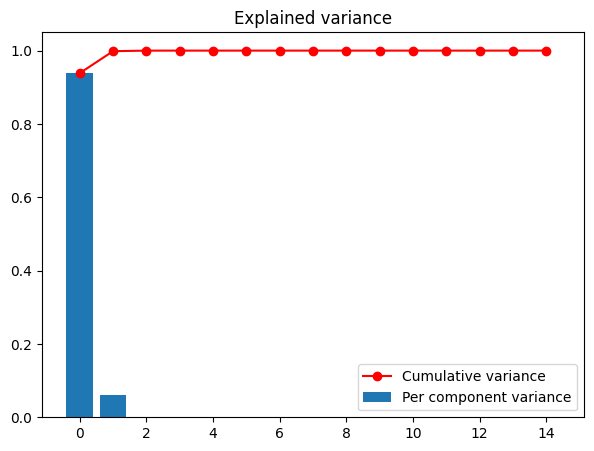

In [27]:
num=len(variables)
plt.rcParams["figure.figsize"] = [7, 5]
plt.bar(range(np.size(explained_variance[0:num])),height=explained_variance[0:num])
plt.plot(np.cumsum(explained_variance),'ro-')
plt.title('Explained variance')
plt.xticks(range(0,len(variables),2))
plt.legend(['Cumulative variance','Per component variance'])
plt.show()

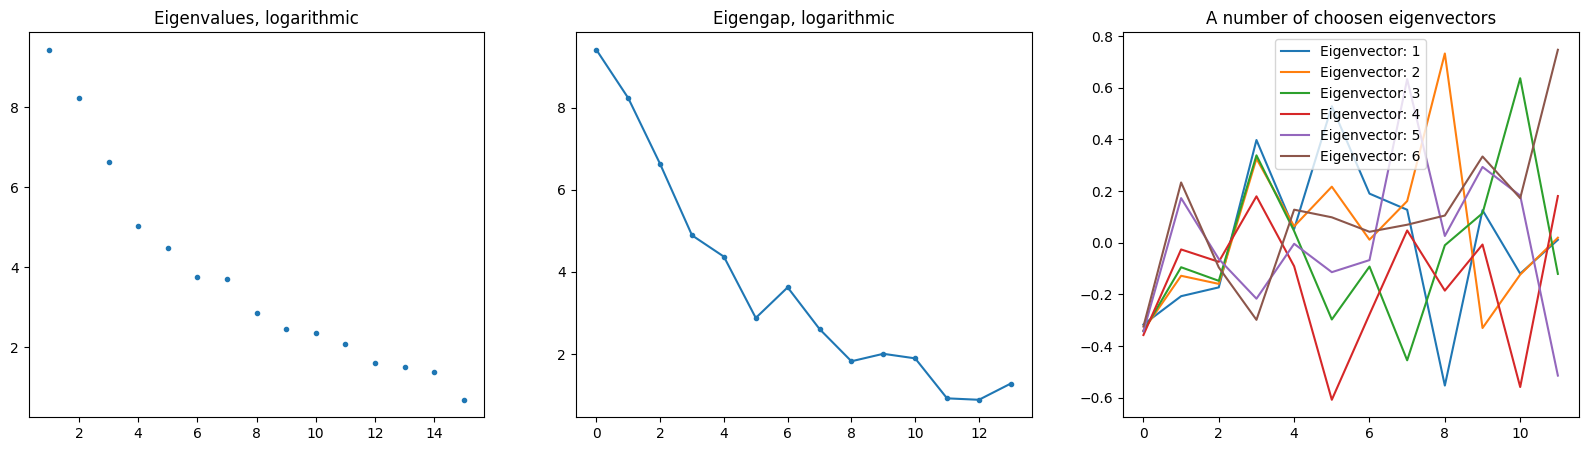

In [28]:
x=[i+1 for i in range(len(eigvals_sort))]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,np.log10(eigvals_sort),'.')
ax1.title.set_text('Eigenvalues, logarithmic')


ax2.plot(np.log10(eigvals_sort[0:-1]-eigvals_sort[1:]),'.-')
ax2.title.set_text('Eigengap, logarithmic')

num_eigenvecs=6
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()